In [98]:
# Importing the required packages
import pandas as pd
import seaborn as sns
import nltk
import matplotlib.pyplot as plt

### Data Understanding

In [99]:
# Reading the data
df=pd.read_csv("/content/classifier_data.xls")

In [100]:
# Dataframe
df

,category,headline
0,WELLNESS,143 Miles in 35 Days: Lessons Learned
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...
3,WELLNESS,"Oh, What a Difference She Made"
4,WELLNESS,Green Superfoods
...,...,...
49995,SPORTS,This Baseball Team Learned There's A Wrong Way...
49996,SPORTS,Some Young Spurs Fan Dabbed 38 Times In A Sing...
49997,SPORTS,Rasheed Wallace Ejected From Knicks-Suns Game ...
49998,SPORTS,Why Jake Plummer And Other NFL Players Are Pus...


In [101]:
# Null values in the dataframe
df.isnull().sum()

category    0
headline    0
dtype: int64

<Axes: xlabel='count', ylabel='category'>

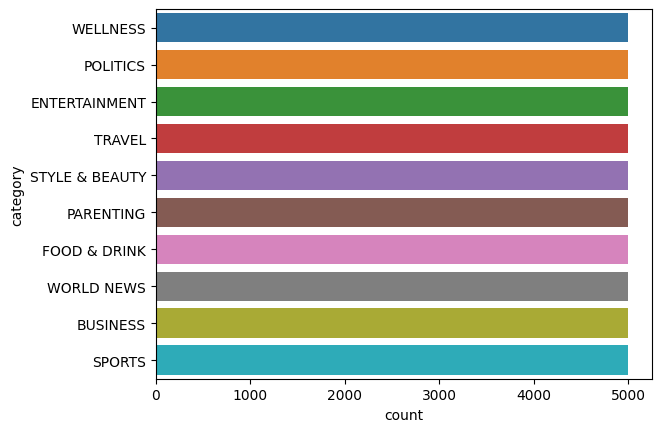

In [102]:
# Classifiers
# Finding out the total number of plots and headlines:
sns.countplot(y=df['category'])

In [103]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

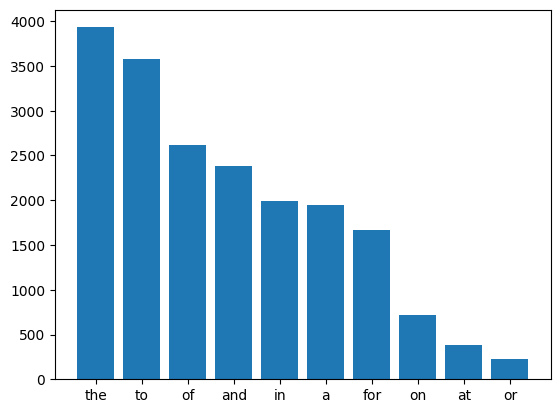

In [104]:
# Visualizing the stopwords
from nltk.corpus import stopwords
def plot_stopwords(data):
    stop=set(stopwords.words('english'))
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    from collections import defaultdict
    dictionary_stopwords=defaultdict(int)
    for word in corpus:
        if word in stop:
            dictionary_stopwords[word]+=1

    top=sorted(dictionary_stopwords.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)
plot_stopwords(df['headline'])

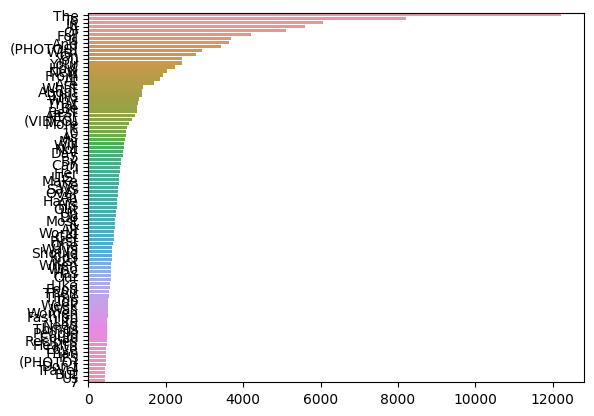

In [105]:
# Visualizing the frequent word
import collections
from collections import Counter
def top_frequent_words(data):
    stop=set(stopwords.words('english'))
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    counter=Counter(corpus)
    mostCommon=counter.most_common()
    x, y=[], []
    for word,count in mostCommon[:100]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x)
top_frequent_words(df['headline'])

### Data Preprocessing

In [106]:
# Lowercasing the column
df['headline']=df['headline'].str.lower()

In [107]:
# Tokenization
df['text_clean'] = df['headline'].apply(nltk.word_tokenize)
print('Step 1-Tokenization Done!.')
df.head()

Step 1-Tokenization Done!.


,category,headline,text_clean
0,WELLNESS,143 miles in 35 days: lessons learned,"[143, miles, in, 35, days, :, lessons, learned]"
1,WELLNESS,talking to yourself: crazy or crazy helpful?,"[talking, to, yourself, :, crazy, or, crazy, h..."
2,WELLNESS,crenezumab: trial will gauge whether alzheimer...,"[crenezumab, :, trial, will, gauge, whether, a..."
3,WELLNESS,"oh, what a difference she made","[oh, ,, what, a, difference, she, made]"
4,WELLNESS,green superfoods,"[green, superfoods]"


In [108]:
# Removal of stopword
en_stopwords = stopwords.words('english')

def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)

    return result

In [109]:
df['text_clean'] = df['text_clean'].apply(remove_stopwords)
df.head()

,category,headline,text_clean
0,WELLNESS,143 miles in 35 days: lessons learned,"[143, miles, 35, days, :, lessons, learned]"
1,WELLNESS,talking to yourself: crazy or crazy helpful?,"[talking, :, crazy, crazy, helpful, ?]"
2,WELLNESS,crenezumab: trial will gauge whether alzheimer...,"[crenezumab, :, trial, gauge, whether, alzheim..."
3,WELLNESS,"oh, what a difference she made","[oh, ,, difference, made]"
4,WELLNESS,green superfoods,"[green, superfoods]"


In [110]:
# Removal of punctuation
from nltk.tokenize import RegexpTokenizer

def remove_punct(text):

    tokenizer = RegexpTokenizer(r"\w+")
    lst=tokenizer.tokenize(' '.join(text))
    return lst

In [111]:
df['text_clean'] = df['text_clean'].apply(remove_punct)
df.head()

,category,headline,text_clean
0,WELLNESS,143 miles in 35 days: lessons learned,"[143, miles, 35, days, lessons, learned]"
1,WELLNESS,talking to yourself: crazy or crazy helpful?,"[talking, crazy, crazy, helpful]"
2,WELLNESS,crenezumab: trial will gauge whether alzheimer...,"[crenezumab, trial, gauge, whether, alzheimer,..."
3,WELLNESS,"oh, what a difference she made","[oh, difference, made]"
4,WELLNESS,green superfoods,"[green, superfoods]"


In [112]:
# Stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
df["text_clean"] = df["text_clean"].apply(lambda x: [stemmer.stem(y) for y in x])

#### Encoding

In [113]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))

tf_idf1 = tf_idf.fit_transform(df[['text_clean']])

tf_idf1


<1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [114]:
df['category'].unique()

array(['WELLNESS', 'POLITICS', 'ENTERTAINMENT', 'TRAVEL',
       'STYLE & BEAUTY', 'PARENTING', 'FOOD & DRINK', 'WORLD NEWS',
       'BUSINESS', 'SPORTS'], dtype=object)

In [115]:
df.category = df.category.map({'WELLNESS':0, 'POLITICS':1, 'ENTERTAINMENT':2, 'TRAVEL':3,
       'STYLE & BEAUTY':4, 'PARENTING':5, 'FOOD & DRINK':6, 'WORLD NEWS':7,
       'BUSINESS':8, 'SPORTS':9})
df.category.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Model

In [116]:
from sklearn.model_selection import train_test_split
X = df.text_clean
y = df.category
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, random_state = 1)

In [117]:
# Converting the string
X_train=X_train.apply(str)
X_test=X_test.apply(str)

In [118]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(stop_words = 'english',lowercase=False)
# fit the vectorizer on the training data
vector.fit(X_train)
vector.vocabulary_
X_transformed = vector.transform(X_train)
X_transformed.toarray()
# for test data
X_test_transformed = vector.transform(X_test)

#### Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_transformed, y_train)
# Fitting our Logistic Regression Model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [120]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(logistic_reg.predict(X_test_transformed), y_test))
print('\n')
print(confusion_matrix(naivebayes.predict(X_test_transformed), y_test))

              precision    recall  f1-score   support

           0       0.70      0.61      0.65      2313
           1       0.69      0.76      0.73      1899
           2       0.71      0.77      0.74      1826
           3       0.76      0.75      0.75      2041
           4       0.81      0.83      0.82      1938
           5       0.74      0.72      0.73      2030
           6       0.80      0.83      0.82      1916
           7       0.76      0.78      0.77      1912
           8       0.76      0.71      0.73      2110
           9       0.87      0.88      0.87      2015

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.76      0.76      0.76     20000



[[1220   45   35   42   41  143   63   42  110   35]
 [  78 1503   67   27   15   38   13  106  131   36]
 [  54   55 1422   44   68   75   42   21   35   52]
 [  62   20   51 1490   33   51   82   56   59   22]
 [  53   13  129   64 1662 

#### Random Forest Classifier

In [121]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_transformed, y_train)

RandomForestClassifier()

In [122]:
print(classification_report(rf.predict(X_test_transformed), y_test))
print('\n')
print(confusion_matrix(rf.predict(X_test_transformed), y_test))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56      2178
           1       0.62      0.73      0.67      1795
           2       0.55      0.79      0.64      1379
           3       0.68      0.67      0.68      2020
           4       0.79      0.74      0.76      2097
           5       0.77      0.51      0.62      2971
           6       0.74      0.76      0.75      1931
           7       0.62      0.76      0.68      1619
           8       0.77      0.72      0.74      2068
           9       0.83      0.88      0.86      1942

    accuracy                           0.70     20000
   macro avg       0.70      0.71      0.70     20000
weighted avg       0.71      0.70      0.69     20000



[[1168  134  143   86   83  179  109   97  114   65]
 [  52 1306   79   28   23   32   18  151   69   37]
 [  37   37 1085   26   51   22   23   49   19   30]
 [  86   54   82 1359   72   50   85  149   39   44]
 [  56   30   89  137 1562 

#### Naive bayes

In [123]:
from sklearn.naive_bayes import MultinomialNB
naivebayes = MultinomialNB()
naivebayes.fit(X_transformed, y_train)

MultinomialNB()

In [124]:
print(classification_report(naivebayes.predict(X_test_transformed), y_test))
print('\n')
print(confusion_matrix(naivebayes.predict(X_test_transformed), y_test))

              precision    recall  f1-score   support

           0       0.61      0.69      0.65      1776
           1       0.72      0.75      0.73      2014
           2       0.72      0.76      0.74      1868
           3       0.74      0.77      0.76      1926
           4       0.84      0.80      0.82      2069
           5       0.72      0.69      0.70      2076
           6       0.82      0.81      0.81      1992
           7       0.80      0.74      0.77      2125
           8       0.70      0.69      0.70      1987
           9       0.87      0.82      0.84      2167

    accuracy                           0.75     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.76      0.75      0.75     20000



[[1220   45   35   42   41  143   63   42  110   35]
 [  78 1503   67   27   15   38   13  106  131   36]
 [  54   55 1422   44   68   75   42   21   35   52]
 [  62   20   51 1490   33   51   82   56   59   22]
 [  53   13  129   64 1662 

#### Support vector machine

In [125]:
# Importing SVM
from sklearn.svm import SVC, LinearSVC

svm = LinearSVC()
svm.fit(X_transformed, y_train)


LinearSVC()

In [126]:
print(classification_report(svm.predict(X_test_transformed), y_test))
print('\n')
print(confusion_matrix(svm.predict(X_test_transformed), y_test))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65      2147
           1       0.67      0.75      0.71      1891
           2       0.68      0.78      0.72      1728
           3       0.76      0.75      0.76      2036
           4       0.81      0.82      0.82      1977
           5       0.75      0.69      0.72      2133
           6       0.80      0.81      0.81      1975
           7       0.74      0.77      0.75      1917
           8       0.78      0.71      0.74      2140
           9       0.88      0.87      0.88      2056

    accuracy                           0.75     20000
   macro avg       0.75      0.76      0.75     20000
weighted avg       0.76      0.75      0.75     20000



[[1343   90   91   81   60  172   98   65  107   40]
 [  60 1410   80   29   15   30   13  138   86   30]
 [  46   63 1345   42   71   53   30   28   18   32]
 [  67   44   65 1532   52   45   82   83   48   18]
 [  36   16   93   54 1620 

#### Decision tree classifier


In [127]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_transformed,y_train)

DecisionTreeClassifier()

In [128]:
print(classification_report(dt.predict(X_test_transformed), y_test))
print('\n')
print(confusion_matrix(dt.predict(X_test_transformed), y_test))


              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1983
           1       0.58      0.66      0.61      1839
           2       0.50      0.62      0.55      1592
           3       0.60      0.64      0.62      1897
           4       0.74      0.69      0.71      2126
           5       0.72      0.51      0.60      2783
           6       0.70      0.70      0.70      1975
           7       0.59      0.68      0.63      1710
           8       0.75      0.71      0.73      2067
           9       0.82      0.82      0.82      2028

    accuracy                           0.65     20000
   macro avg       0.65      0.65      0.65     20000
weighted avg       0.66      0.65      0.65     20000



[[1019  124  131   90   82  163  135   91   98   50]
 [  62 1206  105   55   31   53   24  189   82   32]
 [  83   98  989   51   85   68   41   80   34   63]
 [  97   63   92 1206   80   48   93  134   48   36]
 [  87   33  104  166 1469 

#### Pickling

In [129]:
import pickle
# Pickling the trained model knowledge
with open("news_classifier_pkl","wb") as files:
  pickle.dump(logistic_reg, files)

In [130]:
# Testing
headline1 = ['World Breastfeeding Week: 5 foods new mothers should avoid']
vec = vector.transform(headline1).toarray()
print('Headline:', headline1)
print((list(logistic_reg.predict(vec))[0]))


Headline: ['World Breastfeeding Week: 5 foods new mothers should avoid']
0
